## Try some bond dissociations of PFAS molecules

In [2]:
from nbed.utils import (
    pubchem_mol_geometry,
    build_ordered_xyz_string,
    save_ordered_xyz_file,
)

pfoa = pubchem_mol_geometry("Perfluorooctanoic acid")
pfoa_ordered = build_ordered_xyz_string(pfoa, active_atom_inds=[2, 20])
save_ordered_xyz_file("pfoa", pfoa, active_atom_inds=[2, 20])

/Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


'/Users/michaelwilliamsdelabastida/Code/Nbed/molecular_structures/pfoa.xyz'

In [3]:
pfoa

{0: ('F', (-1.0539, 1.9481, -0.2014)),
 1: ('F', (0.5434, 1.2581, -1.5025)),
 2: ('F', (1.2215, 1.6487, 1.0783)),
 3: ('F', (-0.3328, 0.2934, 1.7581)),
 4: ('F', (-1.8211, 0.1669, -2.1654)),
 5: ('F', (-0.4525, -1.3197, -1.355)),
 6: ('F', (2.0673, -0.7623, 1.9165)),
 7: ('F', (0.8055, -1.7942, 0.487)),
 8: ('F', (-2.9835, -1.7149, -0.6823)),
 9: ('F', (-1.6932, -1.3046, 1.0212)),
 10: ('F', (2.1054, -0.612, -1.6013)),
 11: ('F', (3.3419, -1.7554, -0.2365)),
 12: ('F', (-3.9677, 0.8422, -0.5956)),
 13: ('F', (-2.6826, 1.3007, 1.1093)),
 14: ('F', (-4.1728, -0.274, 1.2669)),
 15: ('O', (4.5699, 0.3287, 0.6742)),
 16: ('O', (3.3666, 1.6773, -0.7043)),
 17: ('C', (-0.2911, 0.8598, -0.5112)),
 18: ('C', (0.5314, 0.5262, 0.7274)),
 19: ('C', (-1.2138, -0.2391, -1.0209)),
 20: ('C', (1.5064, -0.6431, 0.6776)),
 21: ('C', (-2.285, -0.7254, -0.0556)),
 22: ('C', (2.6302, -0.5967, -0.3477)),
 23: ('C', (-3.2786, 0.3, 0.4302)),
 24: ('C', (3.5392, 0.5913, -0.1672)),
 25: ('H', (5.1534, 1.1082, 0

In [4]:
from pyscf.gto import Mole
from pathlib import Path
from pyscf.scf import RHF

filepath = Path("molecular_structures/pfoa.xyz").absolute()
mol = Mole(atom=str(filepath), basis="sto-3g", verbose=4)
mol.build()

mf = RHF(mol)
mf.kernel()

System: uname_result(system='Darwin', node='MacBook-Pro-de-Michael.local', release='23.1.0', version='Darwin Kernel Version 23.1.0: Mon Oct  9 21:32:11 PDT 2023; root:xnu-10002.41.9~7/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
numpy 1.22.4  scipy 1.9.3
Date: Thu Mar  7 13:04:24 2024
PySCF version 2.4.0
PySCF path  /Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 26
[INPUT] num. electrons = 200
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      1.221500000000   1.648700000000   1.078300000000 AA    2.308300461156   3.11

-1918.0405769932213

## Build XYZ for different bond lengths

In [6]:
import numpy as np

def stretch_bond(filename: str, distances: np.ndarray, ) -> None:
    """Stretch the bond of the first two atoms in a .xyz file by a given distance multiplier.
    Args:
        filename (str): The name of the .xyz file to stretch.
        distances (np.ndarray): The distance multipliers to stretch the bond by.
    """

    with open("molecular_structures/pfoa.xyz") as f:
        print(unstretched := f.readlines())
        print(unstretched[2])
        print(unstretched[3])

    f_pos = unstretched[2].removesuffix("\n").split("\t")[1:]
    c_pos = unstretched[3].removesuffix("\n").split("\t")[1:]
    pos_diff = np.array([float(c) - float(f) for f, c in zip(f_pos, c_pos)])
    print(pos_diff)
    
    abs_dist = sum([d**2 for d in pos_diff]) ** (1 / 2)
    distances = np.linspace(0, 3 * abs_dist, 16)[1:]
    print(distances)

    new_pos = [pos_diff * i for i in np.linspace(0, 3, 16)[1:]]
    new_pos
    for i, distance in enumerate(distances):
        position = new_pos[i]
        with open(f"molecular_structures/pfoa_stretch/pfoa_{distance}.xyz", "w") as f:
            f.write(unstretched[0])
            f.write(unstretched[1])

            f.write(f"F\t{position[0]}\t{position[1]}\t{position[2]}\n")

            for l in unstretched[3:]:
                f.write(l)

In [7]:
from pyscf.gto import Mole
from pathlib import Path
from pyscf.scf import RHF, UHF

filepath = Path("molecular_structures/pfoa_active.xyz").absolute()
mol = Mole(atom=str(filepath), basis="6-31g", verbose=4, spin=1)
mol.build()

mf_active = RHF(mol)
mf_active.kernel()

System: uname_result(system='Darwin', node='MacBook-Pro-de-Michael.local', release='23.1.0', version='Darwin Kernel Version 23.1.0: Mon Oct  9 21:32:11 PDT 2023; root:xnu-10002.41.9~7/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
numpy 1.22.4  scipy 1.9.3
Date: Thu Mar  7 13:04:35 2024
PySCF version 2.4.0
PySCF path  /Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 2
[INPUT] num. electrons = 15
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 1
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      1.221500000000   1.648700000000   1.078300000000 AA    2.308300461156   3.1155

-136.9501026351556

In [8]:
mf_active.mo_coeff.shape

(18, 18)

In [9]:
from nbed.driver import NbedDriver

args = {
    "geometry": pfoa_ordered,
    "n_active_atoms": 2,
    "basis": "sto-3g",
    "xc_functional": "b3lyp",
    "projector": "both",
    "localization": "spade",
    "convergence": 1e-6,
    "max_ram_memory": 8_000,
}
driver = NbedDriver(**args)

Initialize <pyscf.gto.mole.Mole object at 0x2b22dc370> in <pyscf.dft.rks.RKS object at 0x2b22dcca0>
Initialize <pyscf.gto.mole.Mole object at 0x2b22dc730> in <pyscf.dft.rks.RKS object at 0x2b22dc070>
2024-03-07 13:05:19,221: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.


In [10]:
driver.embedded_scf[0].mo_coeff.shape

(126, 31)

In [11]:
driver.embedded_scf[0].mo_occ.shape

(31,)

# Embedded CCSD - No Core

In [12]:
from pyscf import cc

energies = []
emb_ccsd, _ = driver._run_emb_CCSD(driver.embedded_scf[0])
energies.append(
    emb_ccsd.e_tot
    + driver.e_env
    + driver.two_e_cross
    - driver._huzinaga["correction"]
    - driver._huzinaga["beta_correction"]
)
print(f"Active space: 0, Energy: {energies[-1]}")

basic_cc = cc.CCSD(mf)
bcc_energy = basic_cc.kernel()
print(bcc_energy)

for i in range(1, driver.embedded_scf[0].mo_coeff.shape[-1]):
    if i == 0:
        frozen = None
    else:
        frozen = [i for i in range(driver.embedded_scf[0].mo_occ.size)][-i:]
    emb_ccsd, _ = driver._run_emb_CCSD(driver.embedded_scf[0], frozen=frozen)
    total_e = (
        emb_ccsd.e_tot
        + driver.e_env
        + driver.two_e_cross
        - driver._huzinaga["correction"]
        - driver._huzinaga["beta_correction"]
    )
    energies.append(total_e)
    print(f"Active space: {i}, Energy: {total_e}")

Active space: 0, Energy: -1925.3348790605926

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 100, nmo = 126
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 0 MB)
Init t2, MP2 energy = -1918.765844854  E_corr(MP2) -0.725267860778473
Init E_corr(CCSD) = -0.725267860794845
cycle = 1  E_corr(CCSD) = -0.820639507849909  dE = -0.0953716471  norm(t1,t2) = 0.123402
cycle = 2  E_corr(CCSD) = -0.866981838967885  dE = -0.0463423311  norm(t1,t2) = 0.0379375
cycle = 3  E_corr(CCSD) = -0.878058001887807  dE = -0.0110761629  norm(t1,t2) = 0.0172867
cycle = 4  E_corr(CCSD) = -0.885624002350656  dE = -0.00756600046  norm(t1,t2) = 0.00644623
cycle = 5  E_corr(CCSD) = -0.885438481028275  dE = 0.000185521322  norm(t1,t2) = 0.00151691
cycle = 6  E_corr(CCSD) = -0.885352207532275  dE = 8.6273496e-05  norm(t1,t2) = 0.000598703
cycle = 7  E_corr(CCSD) = -0.885350001624185  d

In [13]:
basic_cc.e_tot

-1918.9259192723198

In [14]:
-1918.92591927232

-1918.92591927232

In [15]:
energies - basic_cc.e_tot

array([-6.40895979, -6.40895979, -6.40895978, -6.40895977, -6.40895977,
       -6.40895976, -6.40895976, -6.40895973, -6.40895972, -6.40895964,
       -6.40895956, -6.40895949, -6.40895886, -6.40895867, -6.40895792,
       -6.40895734, -6.40895706, -6.40895413, -6.4089531 , -6.40894707,
       -6.40857964, -6.40789737, -6.40775856, -6.40540632, -6.40526967,
       -6.40524805, -6.40522373, -6.40522373, -6.40522373, -6.40522373,
       -6.40522373])

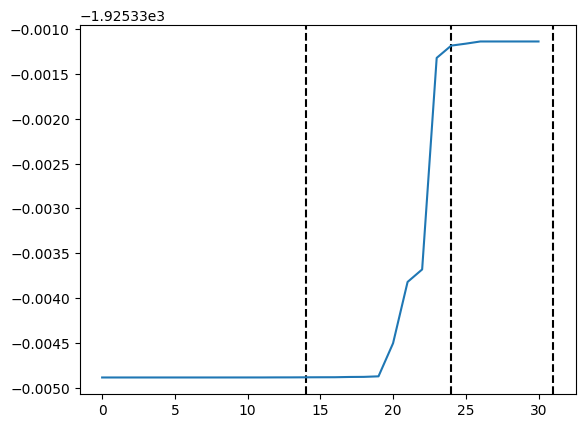

In [16]:
import matplotlib.pyplot as plt

# full = energies[0]
# plt.axhline(y=1.6e-3, linestyle=":", color="green")
# plt.axhline(y=basic_cc.e_tot, linestyle="--", color="black")
for shell in driver.localized_system.shells:
    plt.axvline(x=shell, linestyle="--", color="black")
plt.plot(range(len(energies)), energies)
plt.show()

# Reducing the size of the active space for embedded calculations

It is important to note that the diff from full system CCSd is $\approx 6Ha$

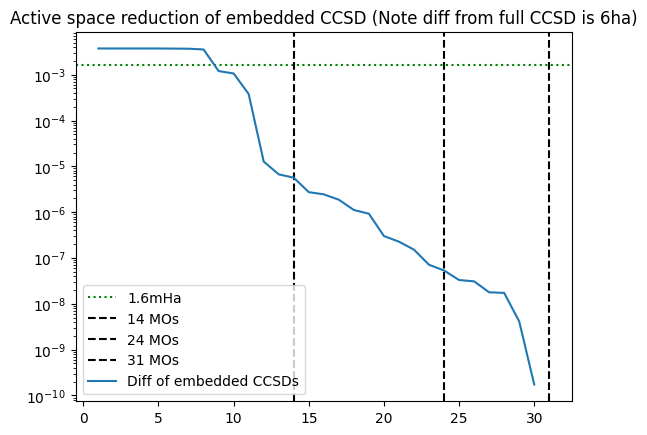

In [17]:
import matplotlib.pyplot as plt

full = energies[0]
plt.axhline(y=1.6e-3, linestyle=":", color="green")
diffs = [abs(e - full) for e in energies[1:][::-1]]
# plt.axhline(y=basic_cc.e_tot, linestyle="--", color="black")
for shell in driver.localized_system.shells:
    plt.axvline(x=shell, linestyle="--", color="black")
plt.semilogy(range(1, driver.embedded_scf[0].mo_coeff.shape[-1]), diffs)
plt.title("Active space reduction of embedded CCSD (Note diff from full CCSD is 6ha)")
plt.legend(
    ["1.6mHa"]
    + [f"{i} MOs" for i in driver.localized_system.shells]
    + ["Diff of embedded CCSDs"]
)
plt.show()

## Building Hamiltonians

How do we build correctly build hamiltonians using reduced active space?

In [18]:
active_sizes = [
    i for i in range(6, driver.localized_system.shells[0])
] + driver.localized_system.shells

In [19]:
from nbed.ham_builder import HamiltonianBuilder
from openfermion.utils import count_qubits

resources = {"n_terms": [], "n_qubits": []}

for i in active_sizes:
    hb = HamiltonianBuilder(
        driver.embedded_scf[0], constant_e_shift=driver.classical_energy[0]
    )
    qham = hb.build(taper=True, core_indices=[], active_indices=[i for i in range(i)])
    resources["n_terms"].append(len(qham.terms))
    resources["n_qubits"].append(count_qubits(qham))

2024-03-07 13:06:47,839	INFO worker.py:1673 -- Started a local Ray instance.


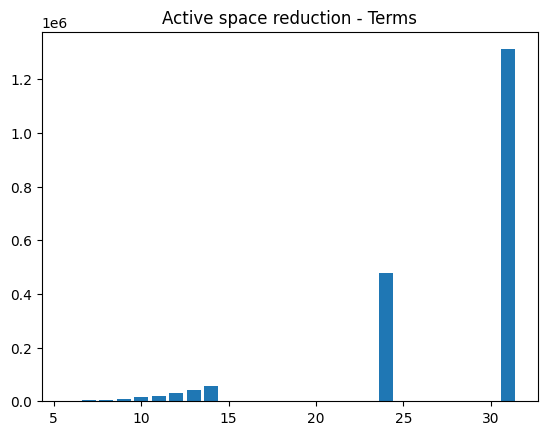

In [20]:
import matplotlib.pyplot as plt

plt.bar(active_sizes, resources["n_terms"])
plt.title("Active space reduction - Terms")
plt.show()

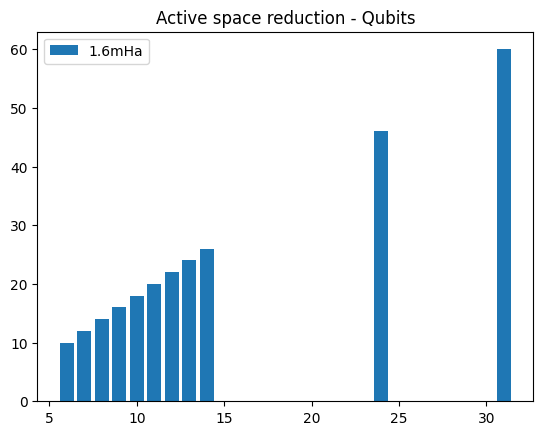

In [21]:
plt.bar(active_sizes, resources["n_qubits"])
plt.title("Active space reduction - Qubits")
plt.legend(
    ["1.6mHa"]
    + [f"{i} MOs" for i in driver.localized_system.shells]
    + ["Diff of embedded CCSDs"]
)
plt.show()

## CCSD EMB - 1 Core

In [22]:
from pyscf import cc
from nbed.driver import NbedDriver

args = {
    "geometry": pfoa_ordered,
    "n_active_atoms": 2,
    "basis": "sto-3g",
    "xc_functional": "b3lyp",
    "projector": "both",
    "localization": "spade",
    "convergence": 1e-6,
    "max_ram_memory": 8_000,
}
core_driver = NbedDriver(**args)

c1_energies = []
emb_ccsd, _ = core_driver._run_emb_CCSD(core_driver.embedded_scf[0])
c1_energies.append(
    emb_ccsd.e_tot
    + core_driver.e_env
    + core_driver.two_e_cross
    - core_driver._huzinaga["correction"]
    - core_driver._huzinaga["beta_correction"]
)

basic_cc = cc.CCSD(mf)
bcc_energy = basic_cc.kernel()
print(bcc_energy)

for i in range(1, core_driver.embedded_scf[0].mo_coeff.shape[-1] - 2):
    if i == 0:
        frozen = None
    else:
        frozen = [0,1] + [i for i in range(core_driver.embedded_scf[0].mo_occ.size)][-i:]
    emb_ccsd, _ = core_driver._run_emb_CCSD(core_driver.embedded_scf[0], frozen=frozen)
    total_e = (
        emb_ccsd.e_tot
        + core_driver.e_env
        + core_driver.two_e_cross
        - core_driver._huzinaga["correction"]
        - core_driver._huzinaga["beta_correction"]
    )
    c1_energies.append(total_e)
    print(f"Active space: {i}, Energy: {total_e}")

Initialize <pyscf.gto.mole.Mole object at 0x2af1a6ef0> in <pyscf.dft.rks.RKS object at 0x2af1a6dd0>
Initialize <pyscf.gto.mole.Mole object at 0x2cdb8b790> in <pyscf.dft.rks.RKS object at 0x2cdb8b760>
2024-03-07 13:13:05,127: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.



******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 100, nmo = 126
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 0 MB)
Init t2, MP2 energy = -1918.765844854  E_corr(MP2) -0.725267860778473
Init E_corr(CCSD) = -0.725267860794845
cycle = 1  E_corr(CCSD) = -0.820639507849909  dE = -0.0953716471  norm(t1,t2) = 0.123402
cycle = 2  E_corr(CCSD) = -0.866981838967885  dE = -0.0463423311  norm(t1,t2) = 0.0379375
cycle = 3  E_corr(CCSD) = -0.878058001887807  dE = -0.0110761629  norm(t1,t2) = 0.0172867
cycle = 4  E_corr(CCSD) = -0.885624002350656  dE = -0.00756600046  norm(t1,t2) = 0.00644623
cycle = 5  E_corr(CCSD) = -0.885438481028275  dE = 0.000185521322  norm(t1,t2) = 0.00151691
cycle = 6  E_corr(CCSD) = -0.885352207532275  dE = 8.6273496e-05  norm(t1,t2) = 0.000598703
cycle = 7  E_corr(CCSD) = -0.885350001624185  dE = 2.20590809e-06  norm(t1,t2) = 0.000179661

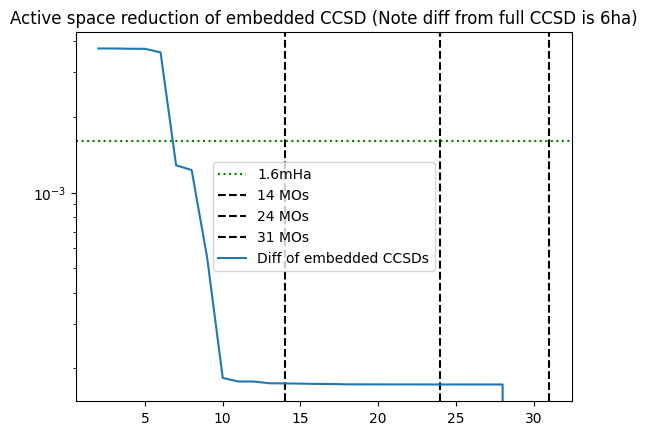

In [23]:
import matplotlib.pyplot as plt

full = c1_energies[0]
plt.axhline(y=1.6e-3, linestyle=":", color="green")
diffs = [abs(e - full) for e in c1_energies[::-1]][1:]
# plt.axhline(y=basic_cc.e_tot, linestyle="--", color="black")
for shell in driver.localized_system.shells:
    plt.axvline(x=shell, linestyle="--", color="black")
plt.semilogy(range(2, driver.embedded_scf[0].mo_coeff.shape[-1]-1), diffs)
plt.title("Active space reduction of embedded CCSD (Note diff from full CCSD is 6ha)")
plt.legend(
    ["1.6mHa"]
    + [f"{i} MOs" for i in driver.localized_system.shells]
    + ["Diff of embedded CCSDs"]
)
plt.show()

# Bond Stretch

In [24]:
from pathlib import Path
from pyscf import scf

hf_bond = []
dft_bond = []
for geometry in Path("molecular_structures/pfoa_stretch").glob("*.xyz"):
    mol = Mole(atom=str(geometry), basis="sto-3g", verbose=4)
    mol.build()

    # Run hf for each
    hf = scf.RHF(mol)
    hf.kernel()
    hf_bond.append(hf.e_tot)

    # Run dft for each
    dft = scf.RKS(mol)
    dft.xc = "b3lyp"
    dft.max_memory = 8_000
    dft.kernel()
    dft_bond.append(dft.e_tot)


System: uname_result(system='Darwin', node='MacBook-Pro-de-Michael.local', release='23.1.0', version='Darwin Kernel Version 23.1.0: Mon Oct  9 21:32:11 PDT 2023; root:xnu-10002.41.9~7/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
numpy 1.22.4  scipy 1.9.3
Date: Thu Mar  7 13:14:17 2024
PySCF version 2.4.0
PySCF path  /Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 26
[INPUT] num. electrons = 200
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      0.797720000000  -6.417040000000  -1.121960000000 AA    1.507472324088 -12.12

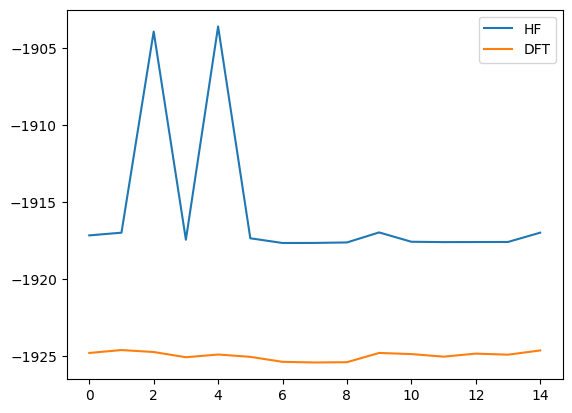

In [25]:
plt.plot(hf_bond)
plt.plot(dft_bond)
plt.legend(["HF", "DFT"])

# Run embedding for different bond lengths

In [26]:
for geometry in Path("molecular_structures/pfoa_stretch").glob("*.xyz"):
    driver = NbedDriver(
        geometry=str(geometry),
        n_active_atoms=2,
        basis="sto-3g",
        xc_functional="b3lyp",
        projector="both",
        localization="spade",
        convergence=1e-6,
        max_ram_memory=8_000,
        run_ccsd_emb=True,
    )
    # mu_builder = HamiltonianBuilder(scf_method=driver._mu["scf"], constant_e_shift=driver._mu["classical_energy"])
    huz_builder = HamiltonianBuilder(scf_method=driver._huzinaga["scf"], constant_e_shift=driver._huzinaga["classical_energy"])
    # mu_qham = mu_builder.build(taper=True, core_indices=[0], active_indices=[i for i in range(1, driver.cl_shells[0])])
    huz_qham = huz_builder.build(taper=True, core_indices=[0], active_indices=[i for i in range(1, driver.cl_shells[0])])


2024-03-07 13:36:00,879: nbed.driver: WARNING: (cheap) global DFT calculation has NOT converged!
Initialize <pyscf.gto.mole.Mole object at 0x2b22299c0> in <pyscf.dft.rks.RKS object at 0x2cdd5c400>


LinAlgError: Singular matrix

# Chain Breaking

